In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
import re
import string
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
from nltk.stem import WordNetLemmatizer
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv('stress.csv')
dataset.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [3]:
dataset.isna().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [4]:
dataset["text"]

0       He said he had not felt that way before, sugge...
1       Hey there r/assistance, Not sure if this is th...
2       My mom then hit me with the newspaper and it s...
3       until i met my new boyfriend, he is amazing, h...
4       October is Domestic Violence Awareness Month a...
                              ...                        
2833    * Her, a week ago: Precious, how are you? (I i...
2834    I don't have the ability to cope with it anymo...
2835    In case this is the first time you're reading ...
2836    Do you find this normal? They have a good rela...
2837    I was talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

In [5]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]https?://\S+|www\.\S+<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
dataset["text"] = dataset["text"].apply(clean)

In [6]:
dataset["text"]

0       said felt way sugget go rest trigger ahead you...
1       hey rassist sure right place post goe  im curr...
2       mom hit newspap shock would know dont like pla...
3       met new boyfriend amaz kind sweet good student...
4       octob domest violenc awar month domest violenc...
                              ...                        
2833     week ago precious ignor  jan  happi year prec...
2834    dont abil cope anymor im tri lot thing trigger...
2835    case first time your read post look peopl will...
2836    find normal good relationship main problem see...
2837    talk mom morn said sister trauma wors mine did...
Name: text, Length: 2838, dtype: object

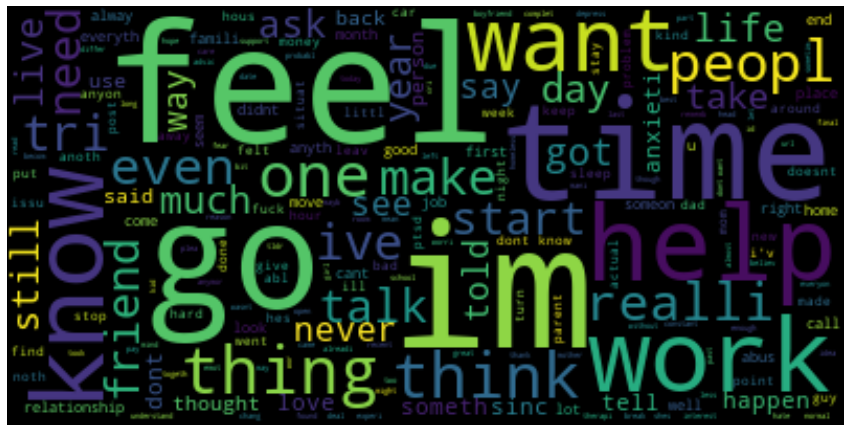

In [7]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
text =' '.join(i for i  in dataset.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color = 'black').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
dataset['label'] = dataset['label'].map({0:'No Stress',1: 'Stress'})
dataset = dataset[["text", "label"]]
dataset

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress
...,...,...
2833,week ago precious ignor jan happi year prec...,No Stress
2834,dont abil cope anymor im tri lot thing trigger...,Stress
2835,case first time your read post look peopl will...,No Stress
2836,find normal good relationship main problem see...,No Stress


In [9]:
import numpy as np
x = np.array(dataset['text'])
y = np.array(dataset['label'])

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [11]:
cv = CountVectorizer()
x = cv.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 12)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2270, 7850), (568, 7850), (2270,), (568,))

In [13]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train,y_train)

BernoulliNB()

In [34]:
y_pred = model.predict(x_test)
y_pred

array(['No Stress', 'No Stress', 'No Stress', 'Stress', 'No Stress',
       'No Stress', 'Stress', 'No Stress', 'No Stress', 'Stress',
       'Stress', 'Stress', 'Stress', 'Stress', 'Stress', 'Stress',
       'Stress', 'No Stress', 'No Stress', 'No Stress', 'No Stress',
       'No Stress', 'Stress', 'Stress', 'Stress', 'Stress', 'Stress',
       'No Stress', 'Stress', 'Stress', 'No Stress', 'Stress',
       'No Stress', 'Stress', 'Stress', 'No Stress', 'Stress', 'Stress',
       'No Stress', 'No Stress', 'Stress', 'Stress', 'Stress', 'Stress',
       'Stress', 'No Stress', 'Stress', 'Stress', 'No Stress', 'Stress',
       'Stress', 'No Stress', 'Stress', 'No Stress', 'No Stress',
       'Stress', 'Stress', 'No Stress', 'No Stress', 'Stress', 'Stress',
       'Stress', 'Stress', 'Stress', 'No Stress', 'Stress', 'No Stress',
       'Stress', 'Stress', 'Stress', 'Stress', 'Stress', 'No Stress',
       'Stress', 'Stress', 'Stress', 'Stress', 'Stress', 'No Stress',
       'No Stress', 'Stre

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7640845070422535

In [36]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: inn
['No Stress']


In [37]:
from pickle import dump
dump(model,open('stress_pickle_file','wb'))


In [38]:
from pickle import load

In [39]:
pickle_file = load(open('stress_pickle_file','rb'))